In [1]:
import os
import sys
sys.path.append(os.getcwd()+"/../..")
from src import paths

import torch

import pandas as pd

from src.utils import plot_embeddings, plot_confusion_matrix, performance_metrics, ms_label2id, ms_id2label, load_ms_data

ms-diag_llama2_4bit_lora_augmented_256 

{'accuracy': 0.9491525423728814, 'f1': 0.8474341192787795, 'precision': 0.8760683760683761, 'recall': 0.8267973856209151} 




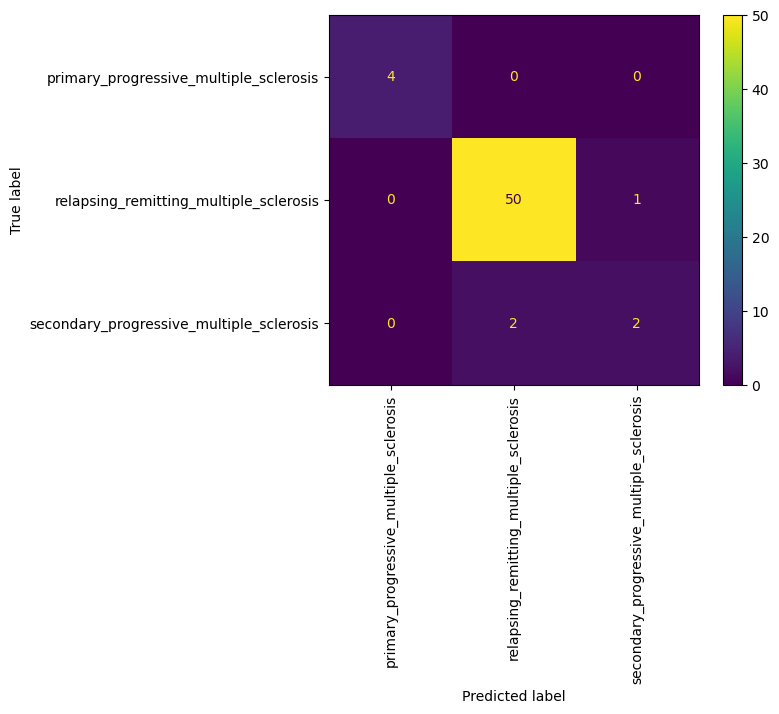

In [9]:
# Data
file_names = ["ms-diag_llama2_4bit_lora_augmented_256",
                    "ms-diag_llama2_4bit_lora_augmented_512",
                   "ms-diag_llama2_bfloat16_lora_augmented_256",
                    "ms-diag_llama2_bfloat16_lora_augmented_512"]

for file_name in file_names:
    data = torch.load(paths.RESULTS_PATH/"ms-diag"/f"{file_name}.pt")
    embeddings = torch.cat(data["last_hidden_state"],dim = 0)
    labels = data["labels"]
    test_preds = data["test_preds"]
    print(file_name, "\n")
    plot_confusion_matrix(labels, test_preds, title=file_name, label2id=ms_label2id)
    print(performance_metrics(labels, test_preds), "\n\n")
    break

In [10]:
df = load_ms_data()
for i, label in enumerate(labels):
    if label != test_preds[i]:
        print("Entry: ", i)
        print("Label", ms_id2label[label])
        print("Predicted", ms_id2label[test_preds[i]])
        print("Text: ", df["test"][i]["text"])
        print("\n")

Entry:  3
Label relapsing_remitting_multiple_sclerosis
Predicted secondary_progressive_multiple_sclerosis
Text:  Schubförmige Multiple Sklerose mit V. a. sekundär chronisch progredienten Verlauf seit ca. 2016, EM 1997, ED 2003, EDSS 6.0 klinisch: nicht aktiv; radiologisch: nicht aktiv; Progression: nein (Lublin, 2013) aktuell: spastische ataktische Gangstörung beinbetont rechts, distal- und beinbetontes motorisches Hemisyndrom rechts, 6Min Gehtest 460m Verlauf:  INDENT 05/ 1997 1.Schub mit beidseitiger Visusminderung, vollständige Rückbildung INDENT 2003 - 2007 alle 1.5 - 2 Jahre ein Schub (motorische Störung der Beine), starke Depression  INDENT 2007 - 2014 mehrere Schübe unter Copaxone (Schubrate nicht bekannt)  INDENT 09/2014: Schub mit Gangunsicherheit und Parese des rechten Beines, Koordinationsstörungen der rechten Hand (inkomplette Regression der Parese des rechten Beines)  INDENT 11/2016 Progression der Steifigkeit und Ermüdbarkeit der rechten Bein in Vergleich zu vergangenen J

In [11]:
# Plot embeddings
embeddings = torch.cat(data["last_hidden_state"],dim = 0)
labels = data["labels"]
test_preds = data["test_preds"]

plot_embeddings(embeddings, labels, test_preds, "pca")

ValueError: Length of values (59) does not match length of index (15104)

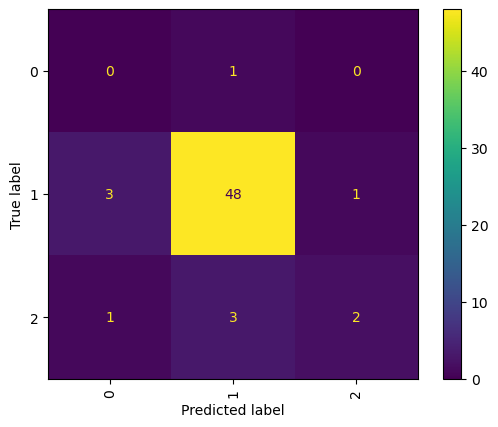

In [18]:
# Plot confusion matrix
plot_confusion_matrix(labels, test_preds, "Confusion Matrix")

In [14]:
# Performance metrics
performance_metrics(labels, test_preds)

{'accuracy': 0.9491525423728814,
 'f1': 0.7867724867724868,
 'precision': 0.7713675213675214,
 'recall': 0.9207547169811322}